# Linear Regression with TensorFlow
--------------------------
### Contents
- **Background [not graded]**
    - Simple linear regression modeling
    - TF-Keras APIs
        - Models
        - Layers
        - Optimizers
    - Sklearn APIs
        - Data splits - train_test_split, Kfold
        - Regression metrics - MSE, MAE
        - Classification metrics - accuracy, classification_report
- **Simple Linear Regression Example - Height Prediction [50 points]**
    - Import data and make train/test split [5]
    - Creating the model [5]
    - Training the model for multiple epochs [10]
    - Evaluating the trained model [10]
    - Visualizing the model fit [5]
    - Repeating the above process with 5-fold cross validation [15]
- **Logistic Regression (Classification) Example - Diabetes Prediction [50 points]**
    - Import data and make train/test split [5]
    - Creating the model [5]
    - Training the model for multiple epochs [10]
    - Evaluating the trained model [10]
    - Plotting the fitted coefficients [5]
    - Questions [15]
--------------------------

# [Section 1] Background - [not graded]

### Simple linear regression modeling

In a linear regression model, we approximate a __linear__ relationship between input variables and an output variable.

![2-variable-equation](./resources/2var_equation.png)

In a simple linear regression model, we approximate the linear relationship between input variable __x__ and the out put __y__, in the form of the linear equation y = b_0 + b_1 * x. For example, the gasoline consumption, in gallons, of a Chevy SSR driving on a highway at a steady speed can be modeled by the number of miles driven using this equation.

<!-- ![chevrolet_ssr](./resources/Chevrolet-SSR.jpg) -->
__number of gallons of gas__ = b_0 + b_1 * __miles traveled__

As you can see, there are two __model parameters__ b_0 and b_1 which we will need to figure out the values. In the data-driven approach, the two model parameters are not set manually, but learned from data. To find these parameters, the classic linear regression method calculates the regression line which satisfy the least squares criterion in a deterministic manner, namely finding the parameters that define the line which gives the least overall error on all datapoints. However, we are going to explore an alternative approach which is the backbone of many general machine learning methods: gradient descent.

![gradient_descent](./resources/gradient_descent.gif)

In gradient descent, we start with random model parameters, then go over all available datapoints one-by-one, and adjust the parameters according to the error from the last iteration.

Watch [this video](https://youtu.be/sDv4f4s2SB8) (23:53) to learn about gradient descent.

### TF-Keras APIs

You will need multiple Keras functions to perform this assignment. Read the links below:
- `Models` for defining the overall model object
    - https://keras.io/api/models/
- `Layers` for defining internal components of your model
    - https://keras.io/api/layers/
- `Optimizers` for defining your Gradient Descent optimization scheme
    - https://keras.io/api/optimizers/

### Sklearn APIs

Similarly, for tasks such as splitting the dataset and computing traditional model performance metrics, you will need to use sklearn functions:
- `train_test_split` and `KFold` for creating data splits
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
- `mean_absolute_error` or ``mean_squared_error`` for computing regression error metrics:
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
- `accuracy` or `classification_report` for computing classification performance metrics
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

Let's import all the APIs we need for this MP in one place. **Before proceeding with the MP, familiarize yourself with the documentation of these functions.**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

from keras.models import Sequential

from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, classification_report

---------------------------------
# [Section 2] Simple Linear Regression Example - Height Prediction [50 points]

Let's predict a person's weight based on their height! More or less, the weight and height of a person conforms to a linear relationship. Explore this [dataset on kaggle](https://www.kaggle.com/sonalisingh1411/linear-regression-using-weight-height), it has already been placed in the `resources` folder. Pay attention to the unique data fields and the size of the dataset.

### Import data and make train/test split [5]

First, import the data from the CSV file into a pandas dataframe in the cell below. Read about how to extract information from [`pandas.Dataframe` reference](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

In [2]:
HEIGHT_WEIGHT_DATA_PATH = "./resources/weight-height.csv"
height_weight = pd.read_csv(HEIGHT_WEIGHT_DATA_PATH)

In [3]:
print("Dimensions of the data (e.g. how many rows, columns)")
print("=========================")
print(f"Rows: {height_weight.shape[0]}, Columns: {height_weight.shape[1]}")
print()

print("Data field names")
print("=========================")
print(height_weight.columns)
print()

print("First few lines of data")
print("=========================")
print(height_weight.head())
print()

Dimensions of the data (e.g. how many rows, columns)
Rows: 10000, Columns: 3

Data field names
Index(['Gender', 'Height', 'Weight'], dtype='object')

First few lines of data
  Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801



Next, we need to prepare the dataset by separating the input feature (X) and the output variable (Y).
<!-- The model reads the input, or feature labels, and makes a prediction on the output. You shoul do this by making two copies of the dataset, one containing only input labels, while the other one only output ground truth. -->
<!-- Hint: use pandas.Dataframe.pop() to remove columns. -->

In [4]:
Y = height_weight['Weight']
X = height_weight['Height']

Before training our model, we need to split the data into the `training` set and the `testing` set. Learn about `train`, `validation`, and `test` sets in [this video](https://youtu.be/Zi-0rlM4RDs)(6:57). In our case, Keras automatically makes a `validation` set from the `training` set during fitting, so we don't have to explicitly make a `validation` set.

Create a training set and a testing set at a 4:1 train-test ratio using the sklearn API. Print out the dimensions of your training set and testing set.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000,) (2000,) (8000,) (2000,)


### Creating the model [5]

It turns out that the linear regression model can be represented as a simple neural network consisting of only one dense layer (here, with 8 input features):

![neural_network](./resources/linear_regression_dnn_visualization.png)

In the following cell, build a keras dense neural network to model a linear regression model. Some part of the code has been provided for you.

**Hint: your model should have a single Dense layer with input dimension matching the dimension of your input features. The number of nodes should match the number of outputs.**

Keras model definition involves three steps:
- Defining the model architecture
- Setting up the optimizer
- Choosing the appropriate loss function

In [6]:
# Step 1 - create Keras sequential model equivalent to a linear regression
model = Sequential()
model.add(Dense(1, input_dim=1))

# Step 2 - Setup the gradient descent algorithm using the Adam optimizer at https://keras.io/api/optimizers/adam/
learning_rate = 5e-3
optimizer = Adam(learning_rate=5e-3)

# Step 3 - Compile the model using an appropriate loss function (mse or mae) and the above optimizer
model.compile(loss='mean_squared_error',optimizer=optimizer)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


2022-12-02 12:06:59.152868: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13873 MB memory:  -> device: 0, name: Tesla V100-SXM2-16GB, pci bus id: 0035:04:00.0, compute capability: 7.0


In the model summary, the number of `learnable` parameters should correspond to the `b_0` and `b_1` parameters that we saw in the background section.

### Training the model for multiple epochs [10]

An `epoch` in the context of model training is defined as one pass over the full training dataset. Training the model for multiple `epochs` means that we iterate over the full dataset multiple times to train/fit our model.

Below, train/fit the model for `50` epochs. Record the training history by receiving the return value from `model.fit`. Plot the training history using `matplotlib`.

In [14]:
history = model.fit(X_train,y_train,epochs=50)

Epoch 1/50
250/250 [==============================] - 0s 1ms/step - loss: 543.8819
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 542.9136
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 542.4085
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 540.8982
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 540.4784
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 540.0216
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 538.8817
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 538.6586
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 537.6920
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 537.0493
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 536.6100
Epoch 12/50
250/250 [==============================] - 0s 1ms/step - loss: 536.0928
E

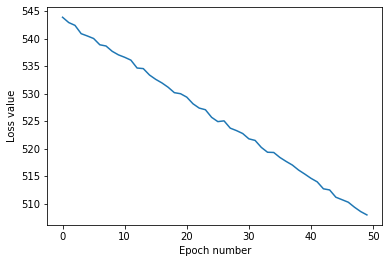

In [15]:
plt.plot(history.history['loss'])
plt.xlabel("Epoch number")
plt.ylabel("Loss value")
plt.show()

### Evaluating the trained model [10]

To measure the performance of the model, we can make predictions on the test set, and then compare the model predictions to the known ground truth value. We will apply common performance metrics for regression models as well as ploting the prediction against the ground truth in the next few cells.

Now, predict the Weight of the data in the test set in the cell below.

In [16]:
predictions = model.predict(X_test)

Print the `mean_square_error` and the `mean_absolute_error` of the predictions in the cell below.

In [17]:
mse = mean_squared_error(predictions,y_test)
print("Mean Squared Error: {:.2f} (inches)".format(mse))

mae = mean_absolute_error(predictions, y_test)
print("Mean Absolute Error: {:.2f} (inches)".format(mae))

Mean Squared Error: 492.68 (inches)
Mean Absolute Error: 18.78 (inches)


### Visualizing the model fit [5]

Plot the ground truth value (red) and the model predictions (blue) in the cell below. Because the predictions are made by a linear regression model, the predictions should fall on a straight line in the plot.

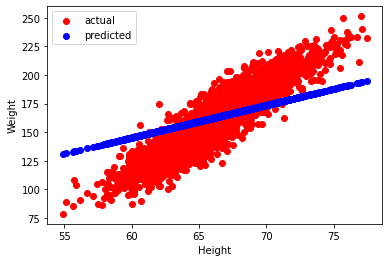

In [18]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(X_test, y_test, c='r',label='actual')
ax1.scatter(X_test, predictions, c='b', label='predicted')
plt.xlabel('Height')
plt.ylabel("Weight")
plt.legend(loc='upper left')
plt.show()

**[Exercise] Based on the above plot, do you think the model has been sufficiently trained within `50` epochs? What happens if you go back and train for an additional `50` epochs?**

**Your answer:** 

- I don't think the model has been sufficiently trained within 50 epochs because the mean squared error is still high; in addition, the predictions don't seem to align with the actual values. After training with an additional 50 epochs the model seems to have decreased loss, but still has a high mean squared error. The exponential decrease in loss doesn't occur again with the additional 50 epochs.

### Repeating the above process with a 5-fold cross validation [15]

So far, we have used only two splits of the data - train and test, and built a single model. However, our results may be biased because of a particular train/test split. It is standard practice when building smaller models to do the data splits several times (also called `folds`) and build one model for each split. This way we get a better estimate (mean and std. deviation) of model performance across multiple splits.

**Below, you can implement 5-Fold cross-validation to build these models either using the sklearn `KFold` function or Keras' validation set options in `Model.fit()` function. After training the 5 models, report the mean and standard deviation of model performance.**

In [40]:
from keras.metrics import BinaryAccuracy
n_folds = 5

kf = KFold(n_splits=n_folds, random_state=None, shuffle=False)

model_cross = Sequential()
model_cross.add(Dense(1, input_dim=1))
learning_rate = 5e-3
optimizer = Adam(learning_rate=5e-3)

model_cross.compile(loss='mean_squared_error',optimizer=optimizer, metrics=['mape'])

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]


    history = model_cross.fit(X_train,y_train, validation_data=(X_test, y_test),epochs=50)
    predictions = model_cross.predict(X_test)
    mse = mean_squared_error(predictions,y_test)
    mae = mean_absolute_error(predictions, y_test)
    print("MSE: ", mse)
    print("MAE: ", mae)
    print(np.mean(history.history['mape']))
    print(np.std(history.history['mape']))
    print("")

#histo = model.fit(X_train, y_train,validation_split = 0.2, epochs=50) # using keras

TRAIN: [2000 2001 2002 ... 9997 9998 9999] TEST: [   0    1    2 ... 1997 1998 1999]
Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 49134.8672 - mape: 141.9012 - val_loss: 46203.6836 - val_mape: 114.2348
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 23080.9746 - mape: 95.0622 - val_loss: 22270.1348 - val_mape: 78.8344
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 9537.2256 - mape: 58.4886 - val_loss: 9934.7480 - val_mape: 52.0461
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 3527.6997 - mape: 31.8947 - val_loss: 4326.0337 - val_mape: 33.5687
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1341.4812 - mape: 17.1348 - val_loss: 2051.2261 - val_mape: 22.2153
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 714.4478 - mape: 13.0274 - val_loss: 1207.3254 - val_mape: 16.2734
Epoch 7/50
250/250 [==============================] - 0s 2

In [41]:
print("Model Mean: %.2f" % (np.mean(histo.history['val_loss'])))
print("Model Standard Deviation: %.2f" % (np.std(histo.history['val_loss'])))

Model Mean: 489.98
Model Standard Deviation: 7.71


**This time when you plot the loss values across epochs, plot it for both the training set and the validation sets.** To do this, you may need to add an option to `model.compile()` and retreive it from `history`.

In [42]:
print(history.history.keys())

dict_keys(['loss', 'mape', 'val_loss', 'val_mape'])


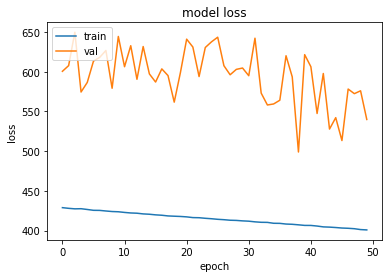

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

-----------------------------------------
# [Section 3] Logistic Regression (Classification) Example - Diabetes Prediction - [50 points]

In this section, we will build a binary classifier (i.e., a classification model) using the same steps taken above. We'll build a model to predict whether an individual has diabetes or not based on their many vital signals and lab measurements. Take a look at the [data on kaggle](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?resource=download).

Classification models differ from regression models in multiple ways:
- Model architecture needs a component that restricts the model output between 0 and 1.
- The loss value is computed in a different way.
- Evaluating model performance needs different metrics.

Keep these differences in mind when working through this section.

### Import data and make train/test split [5]

In [44]:
DIABETES_DATA_PATH = "./resources/diabetes.csv"
diabetes_data = pd.read_csv(DIABETES_DATA_PATH)

print("Dimensions of the data")
print("=========================")
print(f"Rows: {diabetes_data.shape[0]}, Columns: {diabetes_data.shape[1]}")
print()

print("Data field names")
print("=========================")
print(diabetes_data.columns)
print()

print("First few lines of data")
print("=========================")
print(diabetes_data.head())
print()

Dimensions of the data
Rows: 768, Columns: 9

Data field names
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

First few lines of data
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  



Now let's prepare the data for the model

In [45]:
Y = diabetes_data["Outcome"]
X = diabetes_data.drop("Outcome", axis=1)

Split the data into the training set and the testing set.

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(614, 8) (154, 8) (614,) (154,)


### Creating the model [5]

In classification, your model will need a `sigmoid` activation function at the end in order to restrict the regression outputs between 0 and 1. **When compiling the model, be sure to add in the accuracy metric so that we can plot the evolution of training and test set accuracy later.**

In [131]:
# Step 1 - create Keras sequential model equivalent to a linear regression
model2 = Sequential()
model2.add(Dense(1, input_shape=(8,), activation="sigmoid"))

# Step 2 - Setup the gradient descent algorithm
learning_rate = 0.001
optimizer = Adam(learning_rate)

# Step 3 - Compile the model using an appropriate loss function (binary_crossentropy) and the above optimizer
model2.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

model2.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


### Training the model for multiple epochs [10]

Now let's train the model for 200 epochs! Remember to plot the training history.

In [132]:
history = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200)

Epoch 1/200
20/20 [==============================] - 1s 10ms/step - loss: 37.4314 - accuracy: 0.6531 - val_loss: 37.2824 - val_accuracy: 0.6429
Epoch 2/200
20/20 [==============================] - 0s 4ms/step - loss: 34.7135 - accuracy: 0.6531 - val_loss: 34.4001 - val_accuracy: 0.6429
Epoch 3/200
20/20 [==============================] - 0s 4ms/step - loss: 31.9902 - accuracy: 0.6531 - val_loss: 31.6031 - val_accuracy: 0.6429
Epoch 4/200
20/20 [==============================] - 0s 4ms/step - loss: 29.2592 - accuracy: 0.6515 - val_loss: 28.7516 - val_accuracy: 0.6494
Epoch 5/200
20/20 [==============================] - 0s 4ms/step - loss: 26.5596 - accuracy: 0.6531 - val_loss: 26.0701 - val_accuracy: 0.6558
Epoch 6/200
20/20 [==============================] - 0s 4ms/step - loss: 23.8483 - accuracy: 0.6531 - val_loss: 23.5179 - val_accuracy: 0.6364
Epoch 7/200
20/20 [==============================] - 0s 4ms/step - loss: 21.4732 - accuracy: 0.6596 - val_loss: 21.1609 - val_accuracy: 0.629

In [133]:
# hist = model2.fit(X_test, y_test, epochs=200, verbose=0)

In [134]:
for key, value in history.history.items():
    print(key)

loss
accuracy
val_loss
val_accuracy


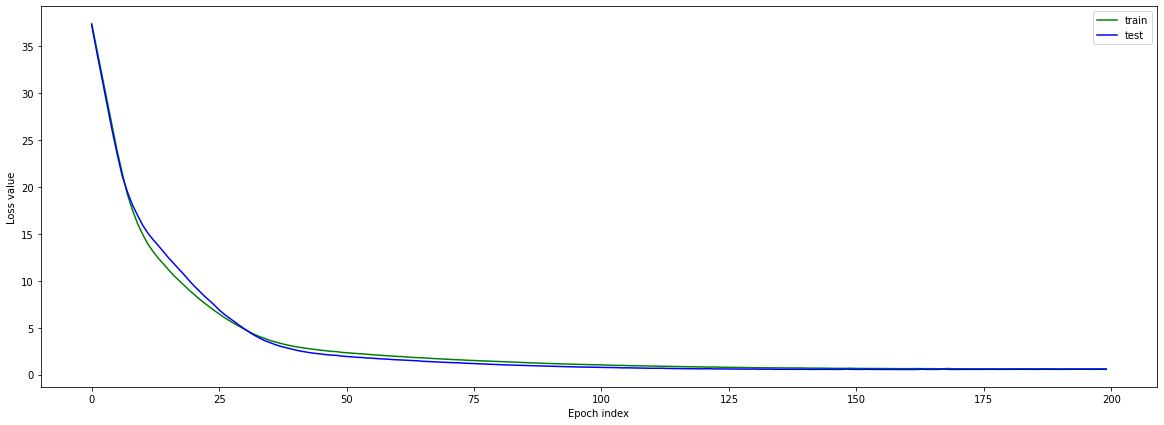

In [135]:
plt.figure(figsize=(20, 7))
plt.plot(history.history['loss'], c="green", label="train")
plt.plot(history.history['val_loss'], c="blue", label="test")
plt.xlabel("Epoch index")
plt.ylabel("Loss value")
plt.legend()
plt.show()

### Evaluating the trained model [10]

Now make predictions on the test set with the trained model. **Remember that the model predictions can take any value between 0 and 1 because of the `sigmoid` activation. Therefore, you need to choose a threshold (say, 0.5) to make a yes/no decision for every sample.**

In [136]:
y_pred = model2.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

In this binary classification problem, we can also print out the model's performance report using the `classification_report` function.

In [137]:
print("Classification report")
print("=========================")
acc = classification_report(y_test, y_pred)
print(classification_report(y_test, y_pred))
print()

Classification report
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        99
           1       0.72      0.60      0.65        55

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154




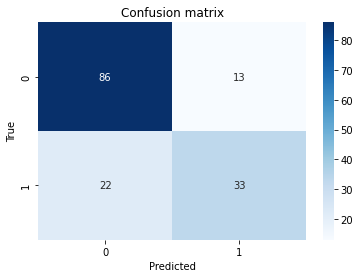

In [138]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

We can also plot the `accuracy` over time during training.

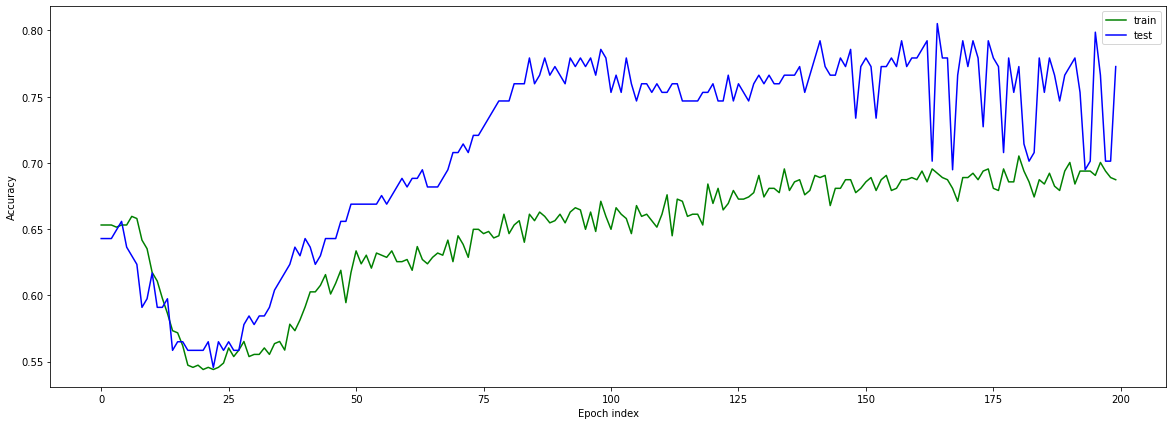

In [139]:
plt.figure(figsize=(20, 7))
plt.plot(history.history['accuracy'], c="green", label="train")
plt.plot(history.history['val_accuracy'], c="blue", label="test")
plt.xlabel("Epoch index")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**[Exercise] What do you notice? Is our model effective at predicting diabetes? Why/why not?**

**Your answer:** 
- I would say that the model is not effective at predicting diabetes. Based on the confustion matrix, the false positive rate is high, so it the model lacks classification power for detecting diabetes. The false negative must be low because it is indicative of not diagnosing diabetes in patients, which is critical in clinical application.

### Plot the coefficients of the logistic regression model using a bar plot [5]

In [140]:
coefficients = model2.layers[0].get_weights()[0]

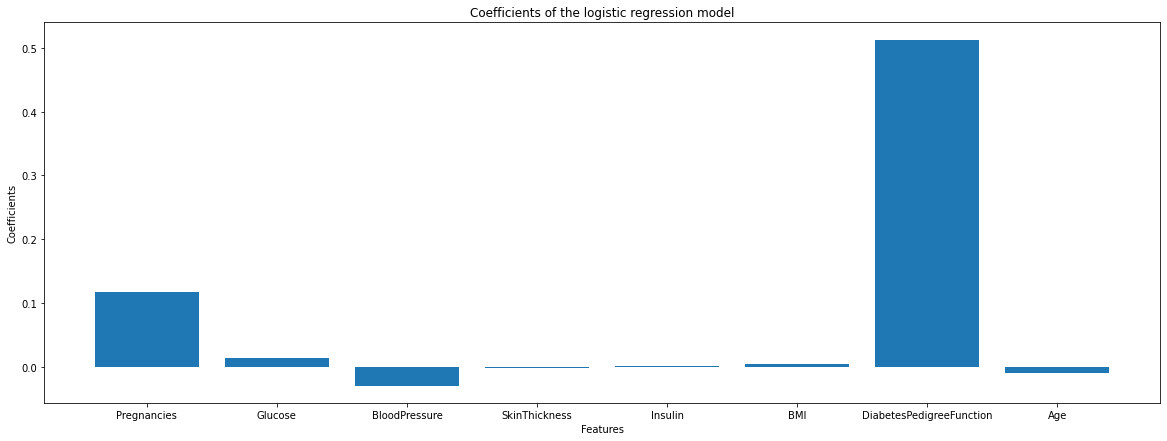

In [141]:
plt.figure(figsize=(20, 7))
plt.bar(X_train.columns, coefficients.flatten())
plt.title("Coefficients of the logistic regression model")
plt.xlabel("Features")
plt.ylabel("Coefficients")
plt.show()

### Questions [15 points]

**Q: Can you interpret what each of the 9 fitted classification model parameters are telling us? [5]**

Answer: The classification model parameters are telling us that Diabetes Pedigree, Pregnancies, and BloodPressure are the highest factors classified in diabetes patients. The other 6 parameters of glucose, Age, skin thickness, insulin, and BMI have low coefficients in the model as they don't have much influence in the classification of diabetes

**Q: Can you list the tunable parameters in the model building pipeline that we've used in this MP? [5]**

Answer: The tunable parameters are learning rate of the optimizer, the optimizer itself, the number of layers for the model, and the activation function.

**Q: These tunable parameters are called "hyperparameters" in machine learning. Can you describe an approach to identify the optimal hyperparameters? [5]**

Answer: There are many approaches to identify optimal hyperparameters. An initial approach is to identify the dimensionality of the data and the number of features, this would influence the depth of the model or the model itself. A typical approach to optimize learning rate is to train the model at differing values and use the model with the lowest. Hyperparameters can be further tuned by gauging trends in loss through training and validation.

- Setting appropriate loss function

- Smoothing out the learning rate (back propagation)
    - setting learning consntant
    - adjustable learning rate with scheduler
    
- Optimizing distribution of weights
    - Normalization (Batch)
    - Dropout
    - Actual model itself